In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import struct
import statistics

In [ ]:
import numpy as np
import pandas as pd
import struct
import matplotlib.pyplot as plt

map_channel = {
     0: 48,
     1: 40,
     2: 56,
     3: 32,
     4: 57,
     5: 33,
     6: 49,
     7: 41,
     8: 50,
     9: 42,
    10: 58,
    11: 34,
    12: 59,
    13: 35,
    14: 51,
    15: 43,
    16: 52,
    17: 44,
    18: 60,
    19: 36,
    20: 61,
    21: 37,
    22: 53,
    23: 45,
    24: 54,
    25: 46,
    26: 62,
    27: 38,
    28: 63,
    29: 39,
    30: 55,
    31: 47,
    32: 16,
    33:  8,
    34: 24,
    35:  0,
    36: 25,
    37:  1,
    38: 17,
    39:  9,
    40: 18,
    41: 10,
    42: 26,
    43:  2,
    44: 27,
    45:  3,
    46: 19,
    47: 11,
    48: 20,
    49: 12,
    50: 28,
    51:  4,
    52: 29,
    53:  5,
    54: 21,
    55: 13,
    56: 22,
    57: 14,
    58: 30,
    59:  6,
    60: 31,
    61:  7,
    62: 23,
    63: 15,
}

map_channel_from_ppx = {
     0: 35,
     1: 37,
     2: 43,
     3: 45,
     4: 51,
     5: 53,
     6: 59,
     7: 61,
     8: 33,
     9: 39,
    10: 41,
    11: 47,
    12: 49,
    13: 55,
    14: 57,
    15: 63,
    16: 32,
    17: 38,
    18: 40,
    19: 46,
    20: 48,
    21: 54,
    22: 56,
    23: 62,
    24: 34,
    25: 36,
    26: 42,
    27: 44,
    28: 50,
    29: 52,
    30: 58,
    31: 60,
    32:  3,
    33:  5,
    34: 11,
    35: 13,
    36: 19,
    37: 21,
    38: 27,
    39: 29,
    40:  1,
    41:  7,
    42:  9,
    43: 15,
    44: 17,
    45: 23,
    46: 25,
    47: 31,
    48:  0,
    49:  6,
    50:  8,
    51: 14,
    52: 16,
    53: 22,
    54: 24,
    55: 30,
    56:  2,
    57:  4,
    58: 10,
    59: 12,
    60: 18,
    61: 20,
    62: 26,
    63: 28,
}   

map_channel_inv = {
     0:  3,
     1:  5,
     2: 11,
     3: 13,
     4: 19,
     5: 21,
     6: 27,
     7: 29,
     8:  1,
     9:  7,
    10:  9,
    11: 15,
    12: 17,
    13: 23,
    14: 25,
    15: 31,
    16:  0,
    17:  6,
    18:  8,
    19: 14,
    20: 16,
    21: 22,
    22: 24,
    23: 30,
    24:  2,
    25:  4,
    26: 10,
    27: 12,
    28: 18,
    29: 20,
    30: 26,
    31: 28,
    32: 35,
    33: 37,
    34: 43,
    35: 45,
    36: 51,
    37: 53,
    38: 59,
    39: 61,
    40: 33,
    41: 39,
    42: 41,
    43: 47,
    44: 49,
    45: 55,
    46: 57,
    47: 63,
    48: 32,
    49: 38,
    50: 40,
    51: 46,
    52: 48,
    53: 54,
    54: 56,
    55: 62,
    56: 34,
    57: 36,
    58: 42,
    59: 44,
    60: 50,
    61: 52,
    62: 58,
    63: 60,
}



def ehist64_to_dataframe(filename="hoge.dat"):
    # 初期化
    hist_data = {f"ch{i}": [] for i in range(64)}
    
    # バイナリファイルの読み込み
    with open(filename, "rb") as f:
        while True:
            # 4バイト(32ビット)の整数を読み込み
            val = f.read(4)
            if len(val) < 4:
                break
            val = struct.unpack("I", val)[0]

            # ヘッダーを確認
            if val == 0xffffea0c:
                # 次の4バイトを読み飛ばす (使用しないイベントカウンタ)
                f.read(4)
                
                # チャンネルデータの読み込み
                for i in range(65):  # 65回繰り返すが、最初の値は無視
                    val = f.read(4)
                    if len(val) < 4:
                        break
                    val = struct.unpack("I", val)[0]
                    if i > 0:
                        # channel_index = map_channel[i - 1]
                        channel_index = map_channel_inv[i - 1]
                        buffer = val & 0xffff  # 下位16ビット
                        hist_data[f"ch{channel_index}"].append(buffer)

    # データをDataFrameに変換
    df = pd.DataFrame.from_dict(hist_data, orient="index").transpose()
    return df


## Dataframe and parameters

In [62]:
# DataFrame

df = ehist64_to_dataframe("../data/cosmic_202502150036.dat")
df = df.dropna(how="all")
df.head()

threshold = 200
thr = [100, 150, 200, 250]

In [63]:
df.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,...,ch54,ch55,ch56,ch57,ch58,ch59,ch60,ch61,ch62,ch63
0,681,812,715,714,703,877,796,732,799,650,...,792,741,776,790,706,795,742,755,870,786
1,742,730,687,742,712,749,746,719,686,720,...,763,763,799,708,784,772,766,899,771,737
2,738,781,727,656,884,984,713,697,643,769,...,779,881,858,721,784,824,767,744,740,759
3,697,804,899,765,747,807,688,784,707,787,...,771,938,849,758,864,751,887,787,838,713
4,802,736,827,744,787,805,704,807,712,796,...,760,843,784,2003,776,783,717,679,800,851


In [64]:
df_ped = ehist64_to_dataframe("../data/baseline.dat")
df_ped = df_ped.dropna(how="all")

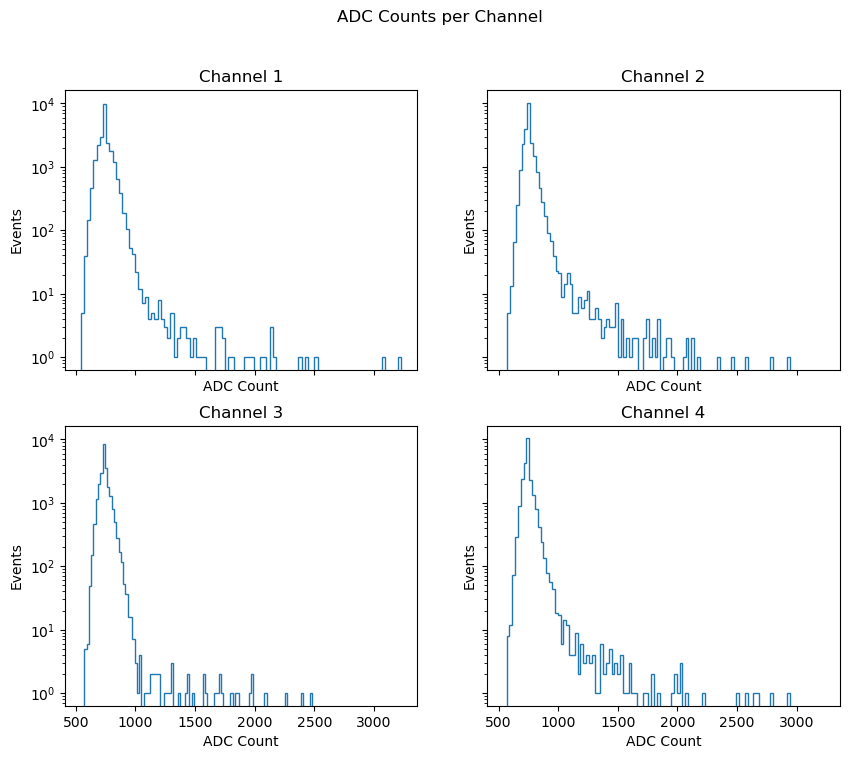

In [65]:
import random

ped = []
df_corrected = pd.DataFrame()

# Make histograms for each channel with all the ADC counts (per channel)
def make_hist(df, random_channels=[1, 2, 3, 4]):
    for ch in range(64):
    
        col = df.columns[ch]
        adc_counts = df[col]
        ped.append(statistics.mode(adc_counts))
        df_corrected[col] = adc_counts.apply(lambda x: x - ped[ch])
        
    # Randomly pick 4 channels to plot
    # random_channels = random.sample(range(64), 4)
    
    # Plot the selected channels
    fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
    fig.suptitle("ADC Counts per Channel")

    for i, ch in enumerate(random_channels):
        col = df.columns[ch]
        adc_counts = df[col]

        ax = axs[i // 2, i % 2]
        ax.hist(adc_counts, bins=100, histtype="step")
        ax.set_title(f"Channel {ch}")
        plt.yscale('log')
        ax.set_xlabel("ADC Count")
        ax.set_ylabel("Events")

    plt.show()


# Call the function

# make_hist(df)
# make_hist(df)
make_hist(df)


In [66]:
new_df = df / 2
new_df.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,...,ch54,ch55,ch56,ch57,ch58,ch59,ch60,ch61,ch62,ch63
0,340.5,406.0,357.5,357.0,351.5,438.5,398.0,366.0,399.5,325.0,...,396.0,370.5,388.0,395.0,353.0,397.5,371.0,377.5,435.0,393.0
1,371.0,365.0,343.5,371.0,356.0,374.5,373.0,359.5,343.0,360.0,...,381.5,381.5,399.5,354.0,392.0,386.0,383.0,449.5,385.5,368.5
2,369.0,390.5,363.5,328.0,442.0,492.0,356.5,348.5,321.5,384.5,...,389.5,440.5,429.0,360.5,392.0,412.0,383.5,372.0,370.0,379.5
3,348.5,402.0,449.5,382.5,373.5,403.5,344.0,392.0,353.5,393.5,...,385.5,469.0,424.5,379.0,432.0,375.5,443.5,393.5,419.0,356.5
4,401.0,368.0,413.5,372.0,393.5,402.5,352.0,403.5,356.0,398.0,...,380.0,421.5,392.0,1001.5,388.0,391.5,358.5,339.5,400.0,425.5


In [67]:
# make_hist(new_df)

In [68]:
# make_hist(df_ped)

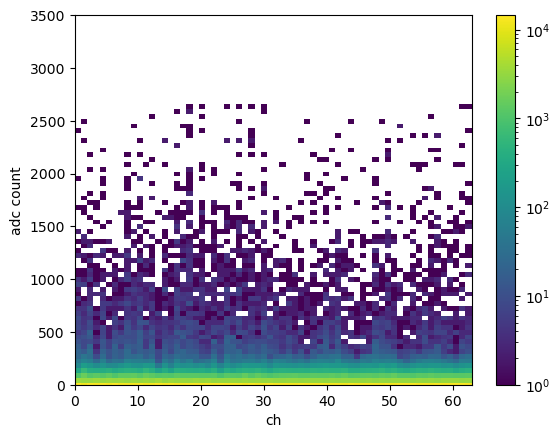

In [69]:
import matplotlib

# Plot the 2D histogram with the channels on the x and the ADC counts on the y, observe gain
def plot_2D(df):
  fig,ax = plt.subplots()

  ch = []
  adc = []
  for i in range(64):
    ch.extend([i]*len(df))    # ch is an array with 64 times 0, 64 times 1 and so on
    adc.extend(df[f"ch{i}"])
    
  histrange=((0,63),(700,850))
    
  hist=ax.hist2d(ch, adc, bins=64,norm=matplotlib.colors.LogNorm(),
               # range=(-500,4000),
              )
  ax.set_ylim(0,3500)
  fig.colorbar(hist[3],ax=ax)

  ax.set_xlabel("ch")
  ax.set_ylabel("adc count")
  plt.show()

# Call the function

plot_2D(df_corrected)

In [70]:
# make_hist(df_corrected)


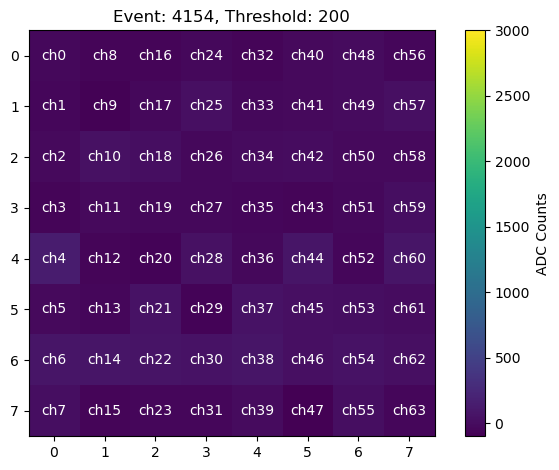

In [ ]:
## Plot the grid with all the channels and the number of counts given by the color.
# Select a threshold for which we consider the ADC count big enough to represent a photon hit.
# Write the channel number in red in case of a hit.
event_random = np.random.choice(len(df_corrected))

def twoDmap(data, threshold, event=None, types=None, vmin=None, vmax=None):
    if types == 'mean':
        filename = 'mean'
        map_data = np.reshape(data.mean().values, (8, 8)).T
    else:
        filename = f'evt{event}'
        map_data = np.array([data.loc[event, f'ch{i}'] for i in range(64)]).reshape(8, 8).T

    #broken_channels
    #broken_chs = [25, 29, 57, 61]
    
    c = plt.imshow(map_data, cmap="viridis", origin="upper", vmin=vmin, vmax=vmax) 
    
    plt.colorbar(c, label="ADC Counts")
    plt.title(f"Event: {event}, Threshold: {threshold}")
    
    for i in range(8):
        for j in range(8):
            #if (i*8+j) in broken_chs:
             #   ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, color = "gray", alpha = 0.8))
            #else:
                text_color = "red" if map_data[i,j] > threshold else "white"
                plt.text(j, i, f"ch{8*j+i}", ha="center", va="center", color=text_color)


twoDmap(df_corrected, threshold, event_random, vmin=-100, vmax=3000)

plt.tight_layout()
plt.show()

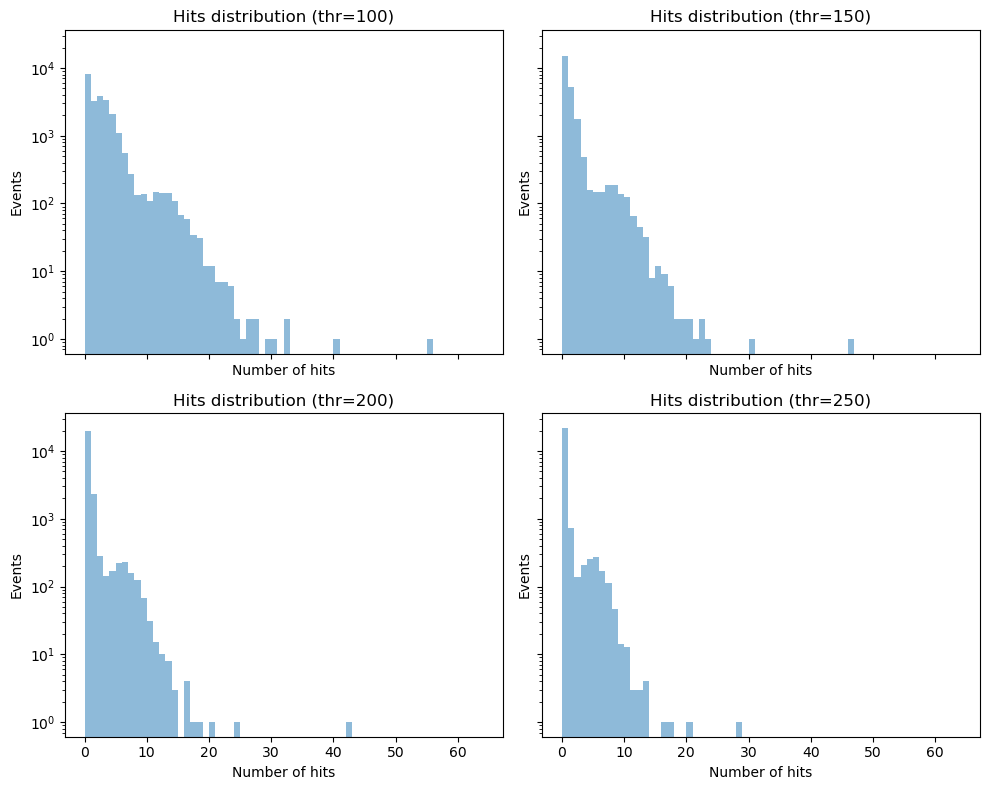

In [72]:
def hits_distrib_thr(df, thr):
    fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
    # create a new dataframe with 1 only where ADC counts > threshold
    for idx, i in enumerate(thr):
        df_hits = (df > i).astype(int)
        df_hits["hits_per_event"] = df_hits.sum(axis=1).values

        ax = axs[idx // 2, idx % 2]
        ax.hist(df_hits["hits_per_event"], bins=64, range=(0,64), alpha=0.5, label=f"thr={i}")
        ax.set_yscale('log')
        ax.set_xlabel("Number of hits")
        ax.set_ylabel("Events")
        ax.set_title(f"Hits distribution (thr={i})")
    
    plt.tight_layout()
    plt.show()

# Call the function

hits_distrib_thr(df_corrected, thr)

In [73]:
df_corrected.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,...,ch54,ch55,ch56,ch57,ch58,ch59,ch60,ch61,ch62,ch63
0,-62,66,-37,-26,-39,125,46,-12,53,-96,...,10,-39,-7,6,-68,18,-34,-25,94,15
1,-1,-16,-65,2,-30,-3,-4,-25,-60,-26,...,-19,-17,16,-76,10,-5,-10,119,-5,-34
2,-5,35,-25,-84,142,232,-37,-47,-103,23,...,-3,101,75,-63,10,47,-9,-36,-36,-12
3,-46,58,147,25,5,55,-62,40,-39,41,...,-11,158,66,-26,90,-26,111,7,62,-58
4,59,-10,75,4,45,53,-46,63,-34,50,...,-22,63,1,1219,2,6,-59,-101,24,80


In [74]:
df_hits1 = (df_corrected > 200).astype(int)
df_hits1["hits_per_event"] = df_hits1.sum(axis=1).values
df_hits1.head(-1)


,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,...,ch55,ch56,ch57,ch58,ch59,ch60,ch61,ch62,ch63,hits_per_event
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Events')

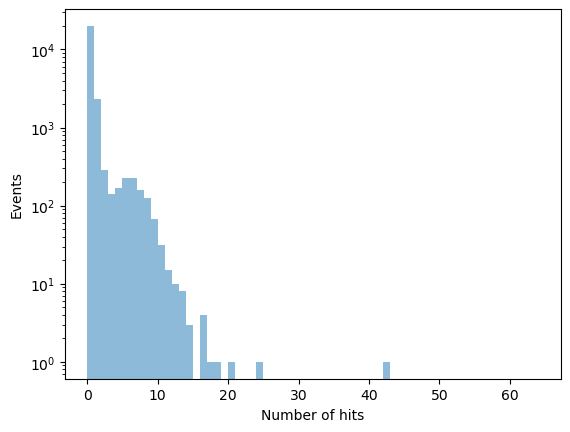

In [75]:
counts, bin_edges, _ = plt.hist(df_hits1["hits_per_event"], bins=64, range=(0,64), alpha=0.5, label="threshold = 150")
plt.yscale('log')
plt.xlabel("Number of hits")
plt.ylabel("Events")

In [76]:
bin_threshold = 3
bin_index = np.searchsorted(bin_edges, bin_threshold, side='right') - 1
integral = np.sum(counts[bin_index:])

print("Number of Cherenkov events: {}".format(integral))
ratio = integral / len(df_hits1)#
print("Ratio of Cherenkov events: {:.2f}".format(ratio))

Number of Cherenkov events: 1193.0
Ratio of Cherenkov events: 0.05


In [77]:
df_hits1.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,...,ch55,ch56,ch57,ch58,ch59,ch60,ch61,ch62,ch63,hits_per_event
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4


In [78]:
limit = 3
ADC_thr = 200

low_events = (df_corrected > ADC_thr).sum(axis=1) < limit
df_low = df_corrected[low_events]
df_low.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,...,ch54,ch55,ch56,ch57,ch58,ch59,ch60,ch61,ch62,ch63
0,-62,66,-37,-26,-39,125,46,-12,53,-96,...,10,-39,-7,6,-68,18,-34,-25,94,15
1,-1,-16,-65,2,-30,-3,-4,-25,-60,-26,...,-19,-17,16,-76,10,-5,-10,119,-5,-34
2,-5,35,-25,-84,142,232,-37,-47,-103,23,...,-3,101,75,-63,10,47,-9,-36,-36,-12
3,-46,58,147,25,5,55,-62,40,-39,41,...,-11,158,66,-26,90,-26,111,7,62,-58
5,3,21,137,16,105,80,-18,115,-95,-14,...,-19,-39,42,-41,-14,13,-103,30,-28,36


In [79]:
print(len(df_corrected))


23779


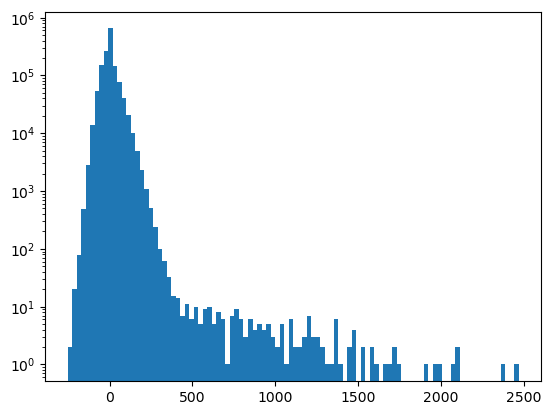

In [80]:
plt.hist(df_low.values.flatten(), bins=100);
plt.yscale("log")

In [81]:
limit = 3
ADC_thr = 300

high_events = (df_corrected > ADC_thr).sum(axis=1) >= limit
df_high = df_corrected[high_events]
df_high.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,...,ch54,ch55,ch56,ch57,ch58,ch59,ch60,ch61,ch62,ch63
4,59,-10,75,4,45,53,-46,63,-34,50,...,-22,63,1,1219,2,6,-59,-101,24,80
9,-36,-20,-15,-25,-40,23,26,-50,8,66,...,-49,31,434,-36,475,-11,220,-66,-56,-1
111,-10,29,-50,19,17,-10,11,12,0,-24,...,-9,89,-42,-46,-47,1120,45,178,-30,-18
120,49,-31,51,51,-45,54,30,-36,111,905,...,-53,8,-10,25,97,50,-4,-68,-10,54
166,128,133,492,-52,-23,15,152,132,64,100,...,52,87,61,-54,-11,9,-72,-69,-1,3


In [82]:
print(len(df_high))

988


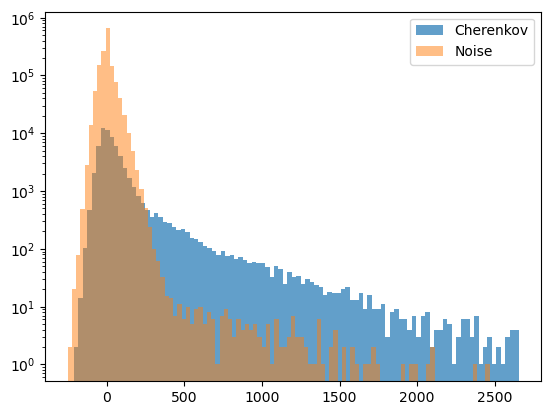

In [83]:
plt.hist(df_high.values.flatten(), bins=100,  alpha = 0.7, label="Cherenkov");
plt.hist(df_low.values.flatten(), bins=100,  alpha = 0.5, label="Noise");
plt.legend()
plt.yscale("log")

In [84]:
bin_threshold = 15
bin_index = np.searchsorted(bin_edges, bin_threshold, side='right') - 1
integral1 = np.sum(counts[bin_index:])

print("Number of multiple eleectrons events: {}".format(integral))
ratio1 = integral1 / len(df_hits1)#
print("Ratio of multiple electrons events: {:.2f}".format(ratio))

Number of multiple eleectrons events: 1193.0
Ratio of multiple electrons events: 0.05


In [85]:
df_high.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,...,ch54,ch55,ch56,ch57,ch58,ch59,ch60,ch61,ch62,ch63
4,59,-10,75,4,45,53,-46,63,-34,50,...,-22,63,1,1219,2,6,-59,-101,24,80
9,-36,-20,-15,-25,-40,23,26,-50,8,66,...,-49,31,434,-36,475,-11,220,-66,-56,-1
111,-10,29,-50,19,17,-10,11,12,0,-24,...,-9,89,-42,-46,-47,1120,45,178,-30,-18
120,49,-31,51,51,-45,54,30,-36,111,905,...,-53,8,-10,25,97,50,-4,-68,-10,54
166,128,133,492,-52,-23,15,152,132,64,100,...,52,87,61,-54,-11,9,-72,-69,-1,3


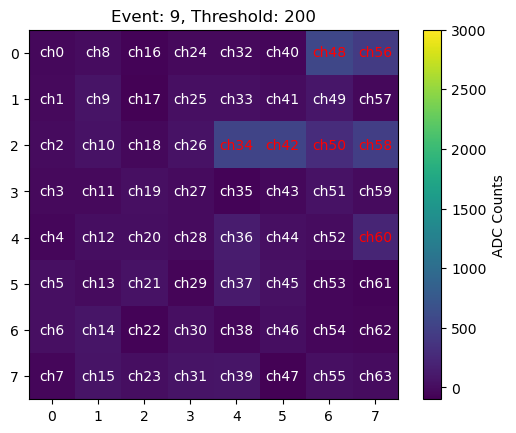

In [116]:
twoDmap(df_high, 200, event=9, vmin=-100, vmax=3000)

In [117]:
high_adc = []
pos = []

def find_single_event(data, threshold, event=None):
    
    filename = f'evt{event}'
    map_data = np.array([data.loc[event, f'ch{i}'] for i in range(64)]).reshape(8, 8).T
    for i in range(8):
        for j in range(8):
            if map_data[i,j] > threshold:
                high_adc.append(map_data[i,j])
                pos.append(8*j+i)   
            else:
                continue
    print(high_adc)
    print(pos)

find_single_event(df_high, 200, event=9)

[555, 434, 530, 530, 291, 475, 220]
[48, 56, 34, 42, 50, 58, 60]


In [125]:
from collections import deque

high_adc = []
pos = []

def find_event_clusters(data, threshold, event=None):
    global high_adc, pos
    high_adc = []
    pos = []
    
    filename = f'evt{event}'
    map_data = np.array([data.loc[event, f'ch{i}'] for i in range(64)]).reshape(8, 8).T
    for i in range(8):
        for j in range(8):
            if map_data[i,j] > threshold:
                high_adc.append(map_data[i,j])
                pos.append((i, j))   
            else:
                continue
    # print("High ADC values:", high_adc)
    # print("Positions:", pos)
    # clusters = find_clusters(pos)
    # print("Clusters:", clusters)

def find_clusters(positions):
    visited = set()
    clusters = []
    
    def check_neighbours(start):
        queue = deque([start])
        cluster = []
        while queue:
            x, y = queue.popleft()
            if (x, y) not in visited:
                visited.add((x, y))
                cluster.append(8 * y + x)  # Convert (i, j) to channel number
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    nx, ny = x + dx, y + dy
                    if (nx, ny) in positions and (nx, ny) not in visited:
                        queue.append((nx, ny))
        # print("Cluster:", cluster)
        return cluster
    
    for pos in positions:
        if pos not in visited:
            cluster = check_neighbours(pos)
            clusters.append(cluster)
    
    return clusters

In [126]:
find_event_clusters(df_high, 200, event=9)

In [144]:
single_ev =[]
multiple_ev = []

for ev in df_corrected.itertuples():
    find_event_clusters(df_corrected, 200, event=ev.Index)
    clusters = find_clusters(pos)
    if len(clusters) > 1:
        multiple_ev.append(ev.Index)
    else:
        single_ev.append(ev.Index)

print("Single electron events:", len(single_ev))
print("Multiple electron events:", len(multiple_ev))

Single electron events: 22476
Multiple electron events: 1303


In [145]:
print("Ratio of single electron events: {:.2f}".format(len(single_ev)/len(df_corrected)))

Ratio of single electron events: 0.95


In [146]:
# Create a new dataframe with only the single electron events
df_single = df_corrected.loc[single_ev].reset_index(drop=True)

print(f"New dataframe with single electron events has {df_single.shape[0]} events.")

New dataframe with single electron events has 22476 events.


In [147]:
df_single.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,...,ch54,ch55,ch56,ch57,ch58,ch59,ch60,ch61,ch62,ch63
0,-62,66,-37,-26,-39,125,46,-12,53,-96,...,10,-39,-7,6,-68,18,-34,-25,94,15
1,-1,-16,-65,2,-30,-3,-4,-25,-60,-26,...,-19,-17,16,-76,10,-5,-10,119,-5,-34
2,-5,35,-25,-84,142,232,-37,-47,-103,23,...,-3,101,75,-63,10,47,-9,-36,-36,-12
3,-46,58,147,25,5,55,-62,40,-39,41,...,-11,158,66,-26,90,-26,111,7,62,-58
4,3,21,137,16,105,80,-18,115,-95,-14,...,-19,-39,42,-41,-14,13,-103,30,-28,36
